In [1]:
import numpy as np
import scipy as sp
from importlib import reload
import neuraltda.topology2 as tp2
import glob
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
block_path = '/home/brad/krista/B1075/P01S03/'
block_path = '/home/brad/krista/B1083/P03S03/'
bdf = glob.glob('/home/brad/krista/B1083/P03S03/binned_data/win-10.0_dtovr-5.0_seg-0-0-fulltrial/20170626T223014Z-10.0-5.0.binned')[0]

print(bdf)

/home/brad/krista/B1083/P03S03/binned_data/win-10.0_dtovr-5.0_seg-0-0-fulltrial/20170626T223014Z-10.0-5.0.binned


In [4]:
reload(tp2)
analysis_id = 'test2'
thresh = 6.0
nperms = 0
ncellsperm = 29
dim = 2
Ntimes = 1000
twin = np.linspace(0, 6000, Ntimes)
(bc, t, t_ms) = tp2.compute_betti_curves(analysis_id, block_path, bdf, thresh, nperms, ncellsperm, dim, twin, 10.0, 5.0, shuffle=False)
(bcs, ts, ts_ms) = tp2.compute_betti_curves(analysis_id, block_path, bdf, thresh, nperms, ncellsperm, dim, twin, 10.0, 5.0, shuffle=True)

In [23]:
twin = np.linspace(0, 100, 5)
print(twin)
test = np.round((twin - 10.0/2.0) / (10.0 - 5.0))
print(test)

[   0.   25.   50.   75.  100.]
[ -1.   4.   9.  14.  19.]


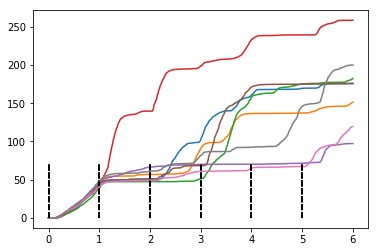

In [5]:
for stim in bc.keys():
    dat = bc[stim]
    avg = np.mean(dat, axis=0)
    plt.plot(t_ms/1000., avg)
    plt.plot(np.array([[x, x] for x in range(6)]).T, np.array([[0, 70] for x in range(6)]).T, 'k--')

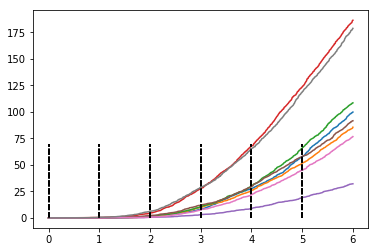

In [6]:
for stim in bc.keys():
    dat = bcs[stim]
    avg = np.mean(dat, axis=0)
    plt.plot(t_ms/1000., avg)
    plt.plot(np.array([[x, x] for x in range(6)]).T, np.array([[0, 70] for x in range(6)]).T, 'k--')

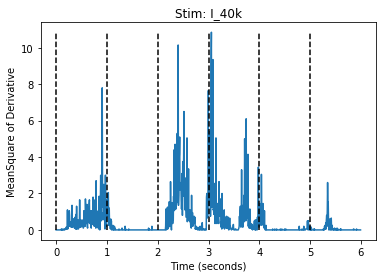

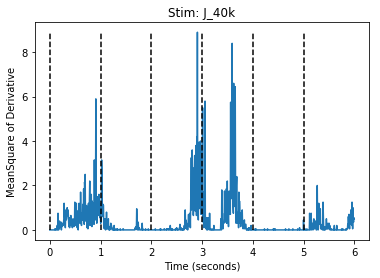

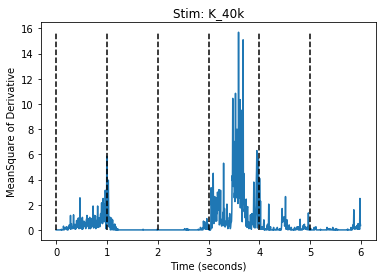

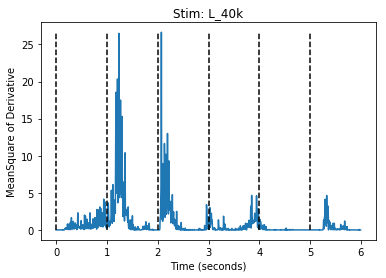

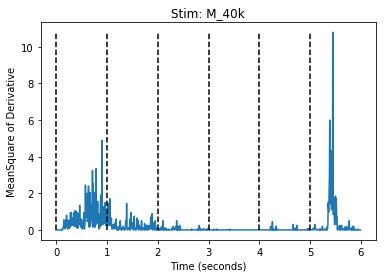

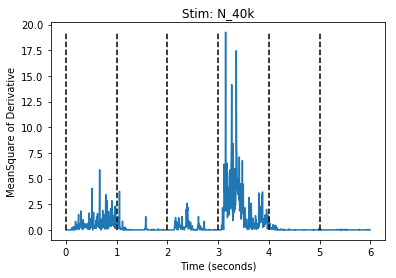

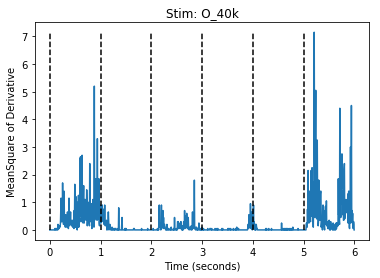

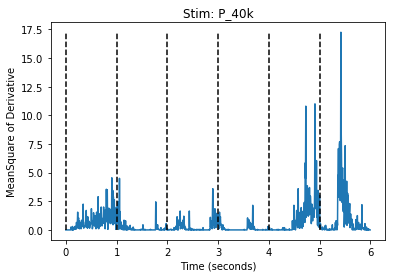

In [22]:
for stim in bc.keys():
    plt.figure()
    dat = bc[stim]
    deriv = dat[:, 1:] - dat[:, :-1]
    avg = np.mean(np.square(deriv), axis=0)
    plt.plot(t_ms[:-1]/1000., avg)
    plt.title('Stim: {}'.format(stim))
    plt.xlabel('Time (seconds)')
    plt.ylabel('MeanSquare of Derivative')
    plt.plot(np.array([[x, x] for x in range(6)]).T, np.array([[0, np.amax(avg)] for x in range(6)]).T, 'k--')
    #plt.savefig('/home/brad/DailyLog/20170719/B1083-P03S03-Betti{}-AvgSqDeriv-Stim{}.png'.format(dim,stim))

In [ ]:
for stim in bc.keys():
    dat = bc[stim]
    avg = np.mean(dat, axis=0)
    deriv = avg[1:] - avg[:-1]
    
    plt.plot(t_ms[:-1]/1000., deriv)
    #plt.plot(np.array([[x, x] for x in range(6)]).T, np.array([[0, 70] for x in range(6)]).T, 'k--')

In [31]:
reload(tp2)
analysis_id = 'test'
thresh = 6.0
nperms = 0
ncellsperm = 40
dim = 2
Ntimes = 3
twin = np.linspace(0, 6000, Ntimes)
(bc2, t, t_ms) = tp2.compute_betti_curves(analysis_id, block_path, bdf, thresh, nperms, ncellsperm, 2, twin, 10.0, 5.0)
(bc1, t, t_ms) = tp2.compute_betti_curves(analysis_id, block_path, bdf, thresh, nperms, ncellsperm, 1, twin, 10.0, 5.0)
(bc0, t, t_ms) = tp2.compute_betti_curves(analysis_id, block_path, bdf, thresh, nperms, ncellsperm, 0, twin, 10.0, 5.0)

In [ ]:
pred_y = np.array([])
pred_x = np.empty((0, 3*Ntimes))
stims = ['M_40k', 'N_40k', 'O_40k', 'P_40k']

for stim in stims:
    dat2 = bc2[stim]
    dat1 = bc1[stim]
    dat0 = bc0[stim]
    (n, npts) = dat2.shape
    dat = np.hstack([dat2, dat1, dat0])
    stim_vec = np.array(n*[B1083_classes[stim]])
    stim_vec = np.array(n*[stim])
    pred_y = np.hstack([pred_y,stim_vec])
    pred_x = np.vstack([pred_x, dat])
    
pred_Y = np.array(pred_y)
pred_X = np.array(pred_x)
    

In [ ]:
pred_Y.shape

In [ ]:
from sklearn.linear_model import LogisticRegression
L = LogisticRegression()
inds = np.random.permutation(np.arange(len(pred_Y)))
inds_train = inds[0:120]
inds_predict = inds[120:]
L.fit(pred_X[inds_train, :], pred_Y[inds_train])

In [ ]:
test = L.predict(pred_X[inds_predict, :])
acc = [test[x] == pred_Y[inds_predict][x] for x in range(len(inds_predict))]
accuracy = np.sum(acc) / len(inds_predict)
print(accuracy)

In [ ]:
inds_predict

In [ ]:
pred_Y[inds_predict].shape

In [ ]:
bc2.keys()

In [33]:
B1083_classes = {'M_40k': 'R', 'N_40k':'L', 'O_40k':'R', 'P_40k':'L'}
B1083_unfclasses = {'I_40k': 'L', 'J_40k': 'R', 'K_40k': 'L', 'L_40k':'R'}

In [27]:
from neuraltda import TPLCP
reload(TPLCP)

<module 'neuraltda.TPLCP' from '/home/brad/code/NeuralTDA/neuraltda/TPLCP.py'>

In [36]:
stims = ['M_40k', 'N_40k', 'O_40k', 'P_40k']
unfstims = ['I_40k', 'J_40k', 'K_40k', 'L_40k']
accuracies = TPLCP.predict_stimuli_classes([bc1, bc2, bc0], Ntimes, stims, B1083_classes, 0.1, 30)
print(np.mean(accuracies))

unfacc = TPLCP.predict_stimuli_classes([bc1, bc2, bc0], Ntimes, unfstims, B1083_unfclasses, 0.1, 30)
print(np.mean(unfacc))

0.966666666667
0.9


In [37]:
accuracies

[1.0,
 0.875,
 0.875,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.875,
 0.875,
 1.0,
 1.0,
 0.875,
 1.0,
 0.875,
 0.875,
 1.0,
 0.875,
 1.0]